# The Mushroom Pokédex - The Mokédex

## The aim of this project is to build a deep learning algorithm that can predict a species of mushroom from a photo, returning the species, common name, and whether it is edible, poisonous, or psychedelic. 

In order to run this project you need to have a GPU linked notebook instance that has the fastai module installed. I am using paperspace gradient's free GPU notebook for this.

### Part 2 - Collecting images and building a CNN

In part 1 I scraped image URLs for 84 mushroom species and generated a list of classes. We will now download the images at each URL using the fastai library, train and evaluate a CNN to predict the species of a mushroom from its image. 

### Initial Setup

Setting up the jupyter notebook environment:

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import the fastai computer vision library and setting batch size:

In [6]:
from fastai.vision import *
bs = 64

### Downloading and Cleaning Images

From part 1 we generated this list of classes based on the mushroom species that we scraped image URLs for. I have copied the result from that document into the classes variable:

In [1]:
classes = ['non-psychedelic', 'psilocybe-semilanceata', 'psilocybe-azurescens', 'psilocybe-cubensis', 'psilocybe-cyanescens']
print(classes)

['non-psychedelic', 'psilocybe-semilanceata', 'psilocybe-azurescens', 'psilocybe-cubensis', 'psilocybe-cyanescens']


In [15]:
# Only run this if you want to delete the mushroom images folder i.e. to get less or more images
import os, shutil
mush_images_folder = os.getcwd() + '/data/__MACOSX'
print(mush_images_folder)
shutil.rmtree(mush_images_folder)

/notebooks/course-v3/nbs/dl1/data/__MACOSX


I uploaded the 'mushroom-images' folder into the 'data' folder in the fastai course as a zip file. The 'mushroom-images' dir contains folders labelled exactly as the classes above, where each class/folder represents one species of mushroom, and inside each folder there is a CSV file containing all of the image URLs gathered for that species of mushroom. We need to unzip this file to create the subdir structure.

In [14]:
import zipfile as zf
files = zf.ZipFile("data/mushroom-images-v2.zip", 'r')
files.extractall('data/')
files.close()

Now we can download the images from each CSV and verify them. Note since there are 80 different species in the non-psychedelic bucket, I will download ~ 8000 images.

Error  No connection adapters were found for ''

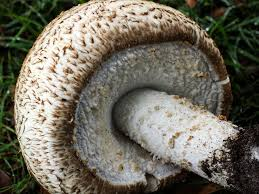
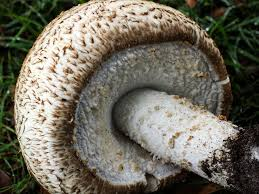

Error  No connection adapters were found for ''

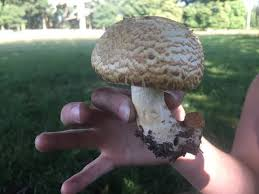
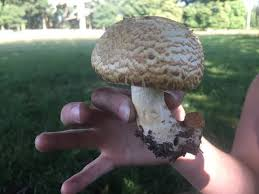

Error  No connection adapters were found for ''

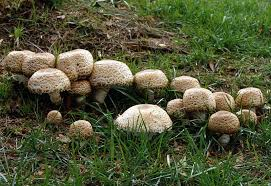
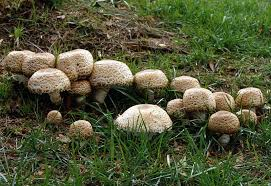

Error  No connection adapters were found for ''

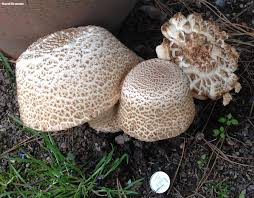
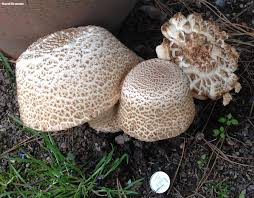

Error  No connection adapters were found for ''

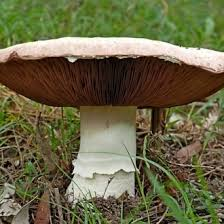
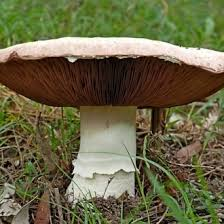

Error  No connection adapters were found for ''

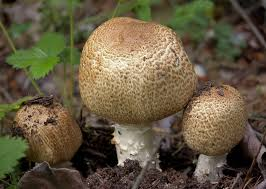
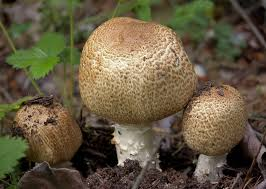

Error  No connection adapters were found for ''

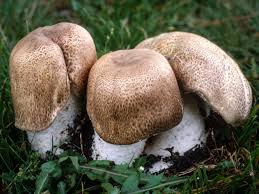
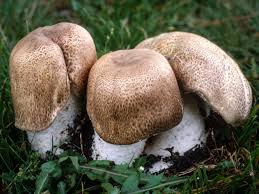

Error  No connection adapters were found for ''

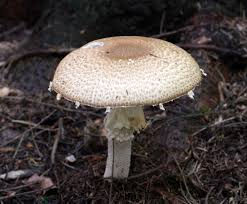
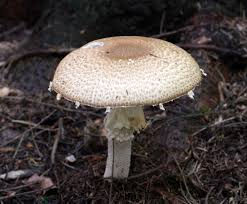

Error  No connection adapters were found for ''

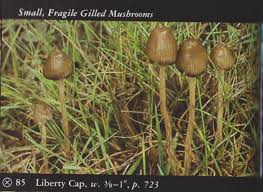
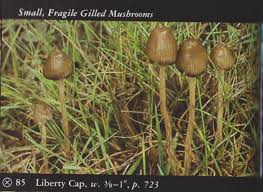

Error  No connection adapters were found for ''

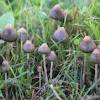
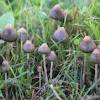

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

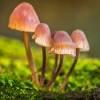
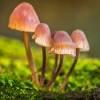
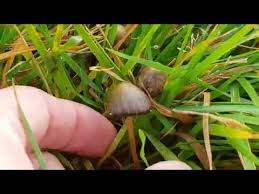
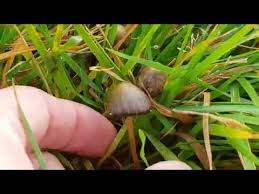

Error  No connection adapters were found for ''

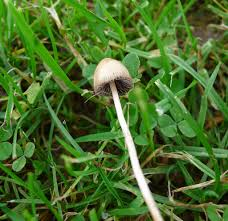
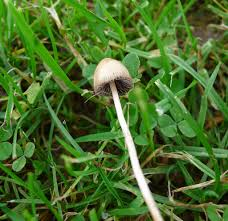

Error  No connection adapters were found for ''

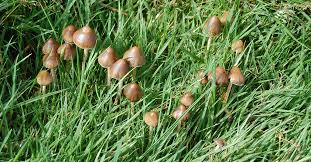
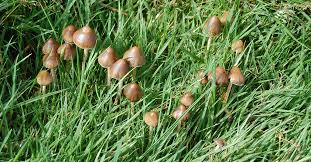

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

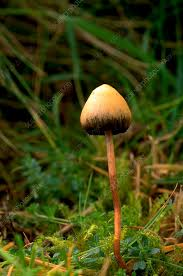
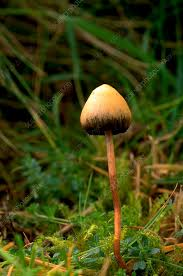
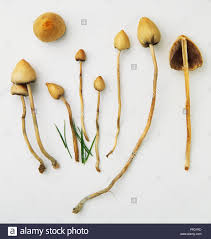
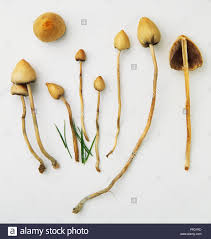

Error  No connection adapters were found for ''

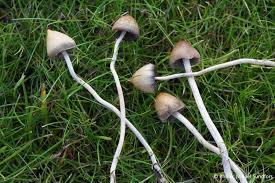
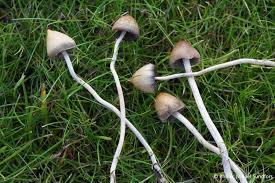

Error  No connection adapters were found for ''

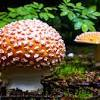
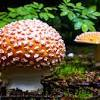

Error  No connection adapters were found for ''

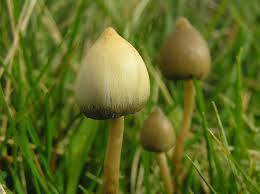
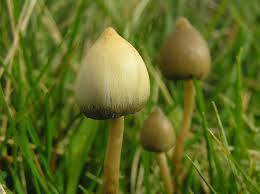

Error  No connection adapters were found for ''

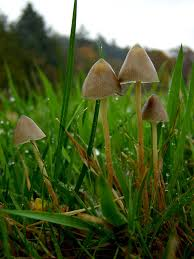
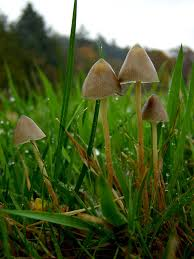

Error  No connection adapters were found for ''

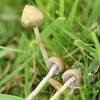
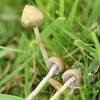

Error  No connection adapters were found for ''

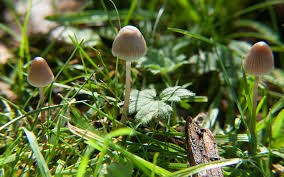
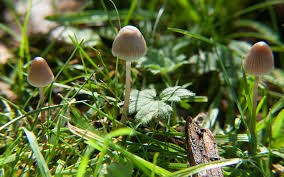

Error  No connection adapters were found for ''

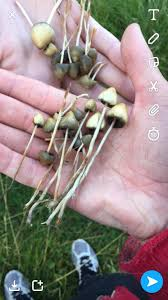
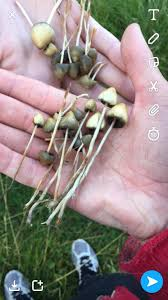

Error  No connection adapters were found for ''

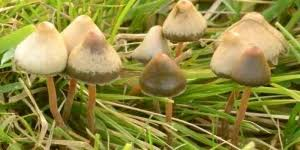
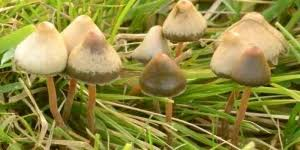

Error  No connection adapters were found for ''

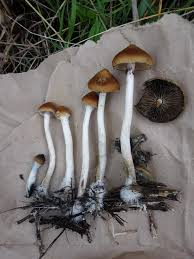
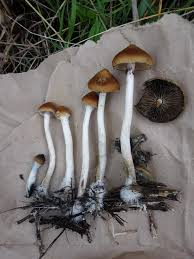

Error  No connection adapters were found for ''

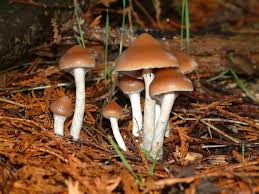
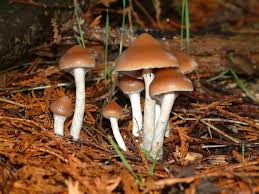

Error  No connection adapters were found for ''

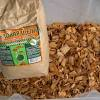
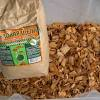

Error  No connection adapters were found for ''

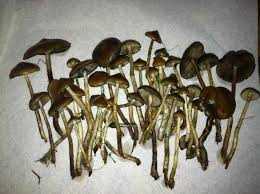
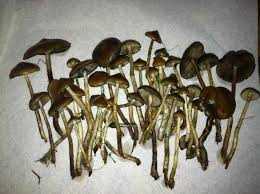

Error  No connection adapters were found for ''

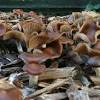
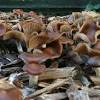

Error  No connection adapters were found for ''

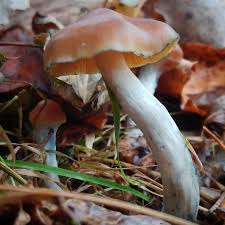
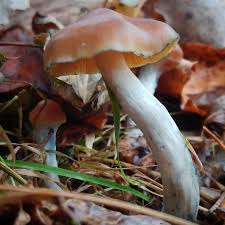

Error  No connection adapters were found for ''

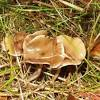
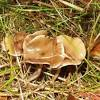

Error  No connection adapters were found for ''

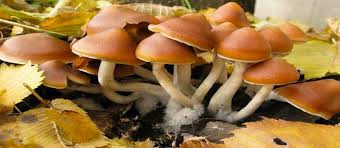
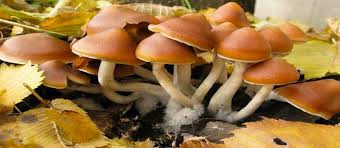

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

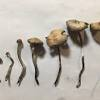
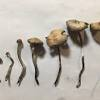
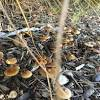
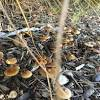

Error  No connection adapters were found for ''

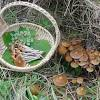
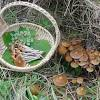

Error  No connection adapters were found for ''

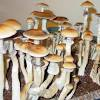
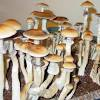

Error  No connection adapters were found for ''

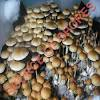
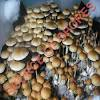

Error  No connection adapters were found for ''

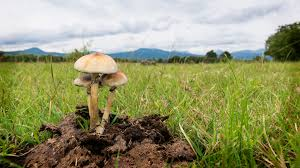
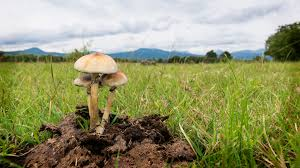

Error  No connection adapters were found for ''

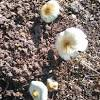
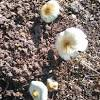

Error  No connection adapters were found for ''

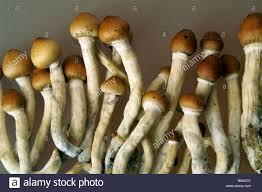
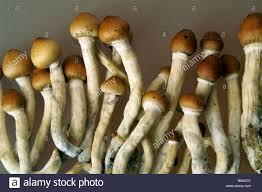

Error  No connection adapters were found for ''

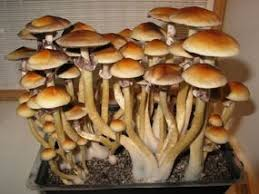
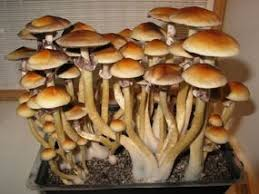

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

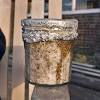
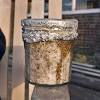
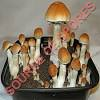
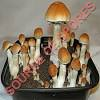

Error  No connection adapters were found for ''

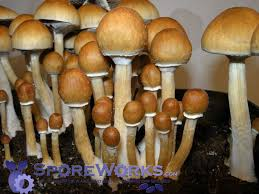
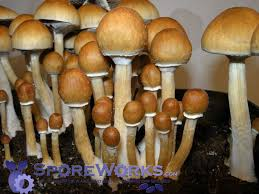

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

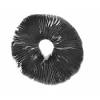
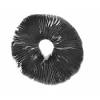
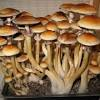
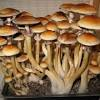

Error  No connection adapters were found for ''

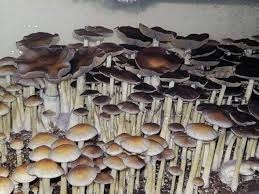
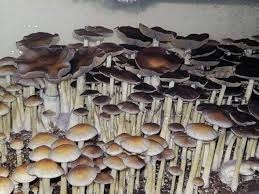

Error  No connection adapters were found for ''

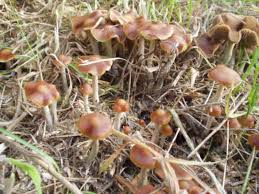
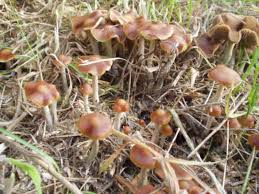

Error  No connection adapters were found for ''

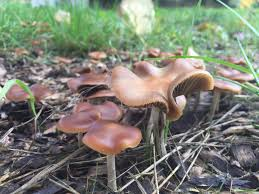
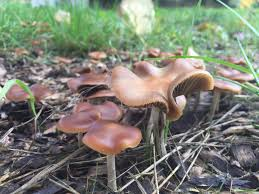

Error  No connection adapters were found for ''

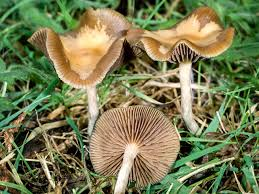
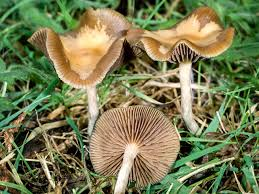

Error  No connection adapters were found for ''

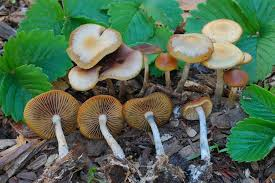
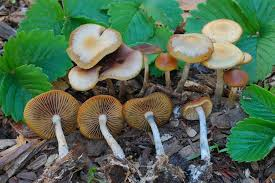

Error  No connection adapters were found for ''

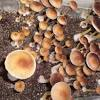
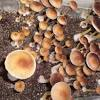

Error  No connection adapters were found for ''

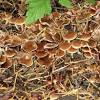
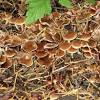

In [17]:
path_to_mush = 'data/mushroom-images-v2/'
for c in classes:
    csv_file = c + '.csv'
    dest = path_to_mush + c
    path_to_file = dest+'/'+csv_file
    if not path_to_file.startswith('non'):
        download_images(dest+'/'+csv_file, dest, max_pics=100, max_workers=0)
    else:
        download_images(dest+'/'+csv_file, dest, max_pics=8000, max_workers=0)        
    verify_images(dest, delete=True, max_size=500)

Now we can create a databunch based on our mushroom-images folder:

In [19]:
image_folder = 'data/mushroom-images-v2'
np.random.seed(42)
data = ImageDataBunch.from_folder(image_folder, train=".", valid_pct=0.2, bs=bs,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Let's take a look at our data:

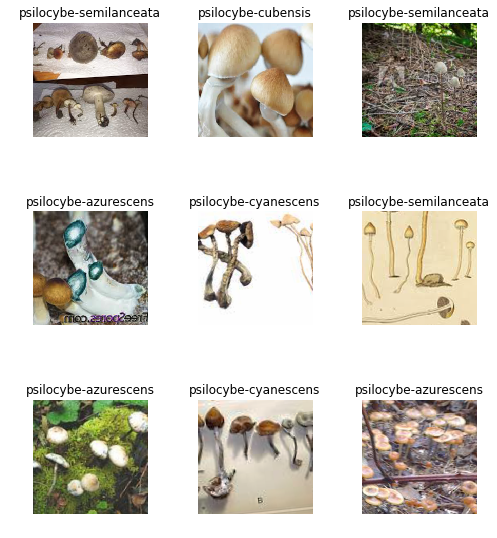

In [20]:
data.classes
data.show_batch(rows=3, figsize=(7,8))

Now let's learn a resnet model on this data:

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [22]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [23]:
learn.fit_one_cycle(4)

Ok so the error rates are quite high. This may due to the similarity between the psychedelic mushroom species..in addition the image quality is not exactly high. As this is not a genuine application i.e. it is purely for me to learn about training a model and manipulating data, I will continue anyway. 

What could be done to improve this? Manually curate the photos, i.e. need to be in similar orientations, no garbage included etc. 

In [24]:
learn.save('stage-1')

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

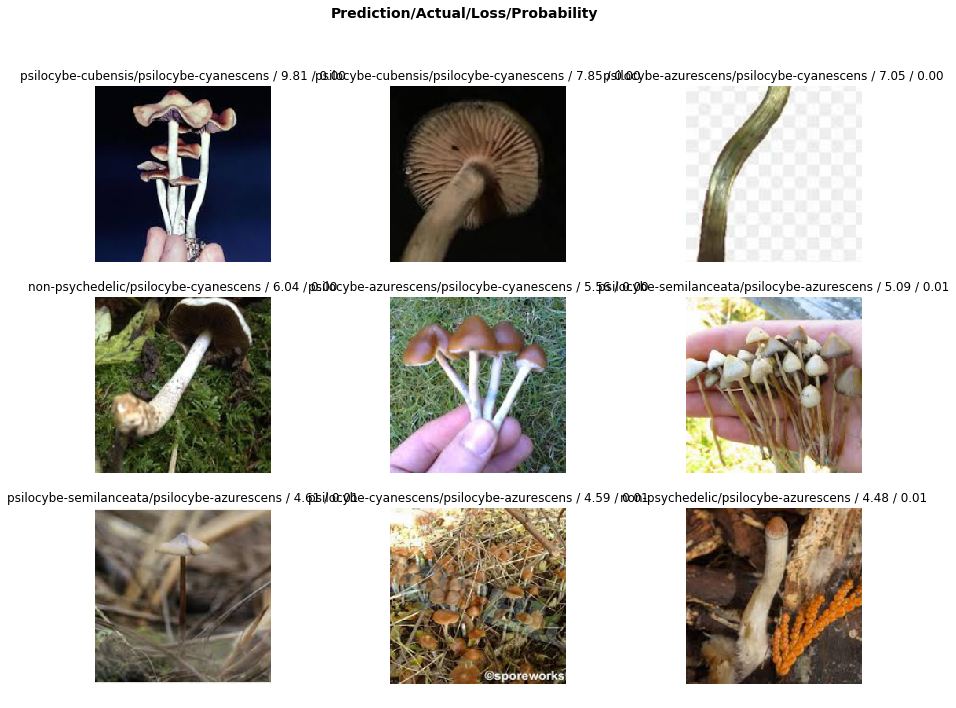

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

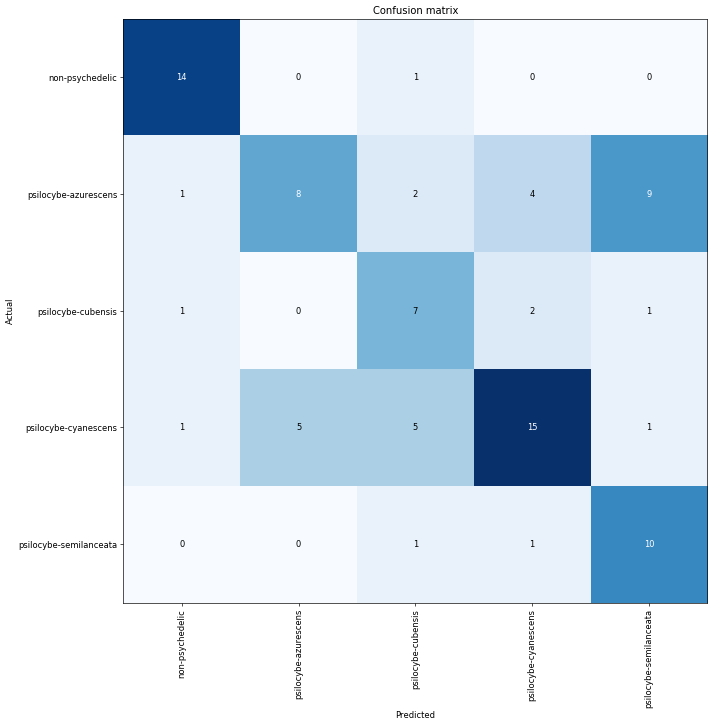

In [27]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

So the confusion matrix shows this, the psychedelic species are commonly confused with each other. So I'm going to delete the image directory and group all of the psychedelics into one group i.e. one class and one CSV, then retrain the model and see what level of accuracy we can get.

In [30]:
# Create a new 'psychedelic' directory in the mushroom-images-v2 directory
current = os.getcwd()
psyche = current + '/data/mushroom-images-v2/psychedelic'
os.makedirs(psyche)

In [31]:
# Move all the psilocybin CSVs into the new 'psychedelic' directory
dirs = classes
for d in dirs:
    if d.startswith('psilocybe'):
        shutil.copy(current + '/data/mushroom-images-v2/' + d + '/' + d + '.csv', psyche)
        shutil.rmtree(current + '/data/mushroom-images-v2/' + d)

In [32]:
# Combine all the CSVs in the psychedelic dir into one CSV
newfile = open(psyche + '/psychedelic.csv', 'a')
for d in dirs:
    if d.startswith('psilocybe'):
        with open(psyche+'/' + d + '.csv') as f:
            for line in f:
                newfile.write(line)
        os.remove(psyche+'/' + d + '.csv')
newfile.close()

Now let's download the images into these new classes.

Error  No connection adapters were found for ''

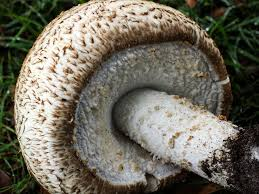
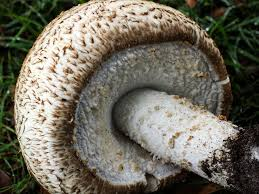

Error  No connection adapters were found for ''

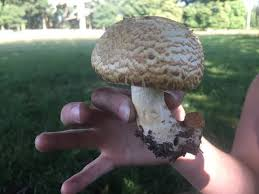
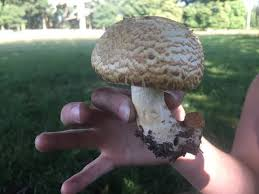

Error  No connection adapters were found for ''

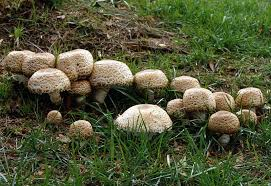
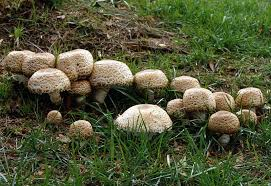

Error  No connection adapters were found for ''

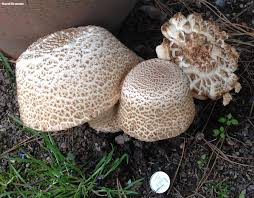
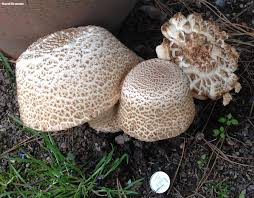

Error  No connection adapters were found for ''

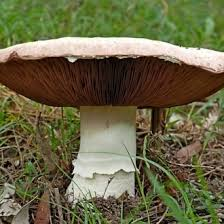
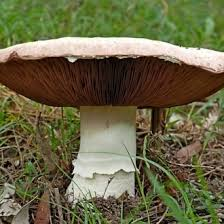

Error  No connection adapters were found for ''

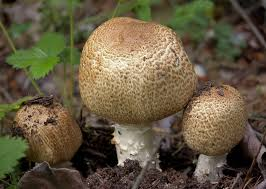
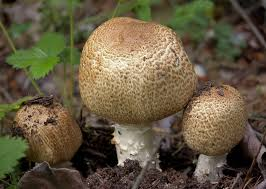

Error  No connection adapters were found for ''

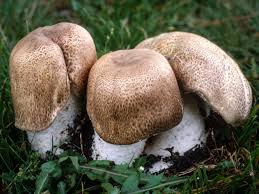
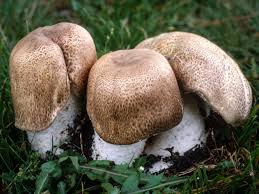

Error  No connection adapters were found for ''

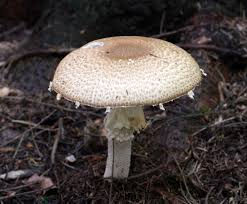
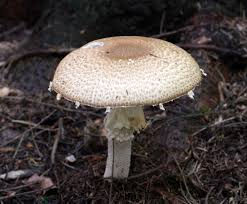

Error  No connection adapters were found for ''

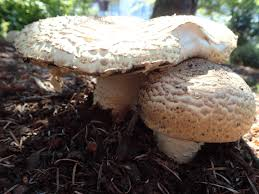
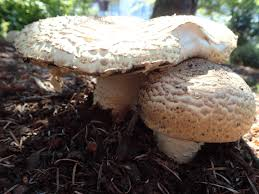

Error  No connection adapters were found for ''

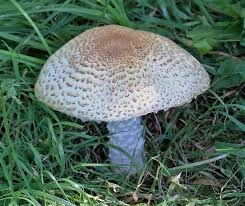
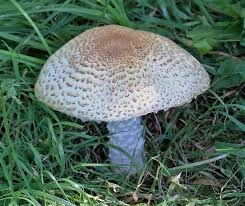

Error  No connection adapters were found for ''

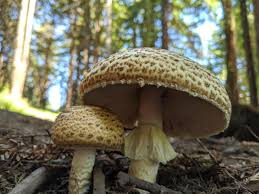
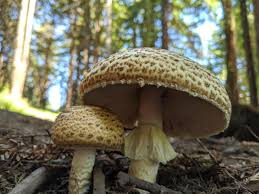

Error  No connection adapters were found for ''

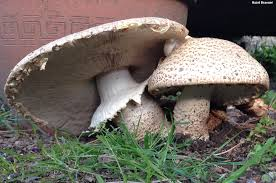
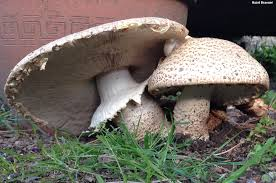

Error  No connection adapters were found for ''

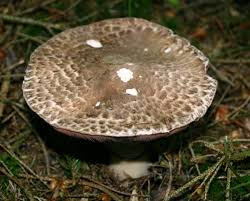
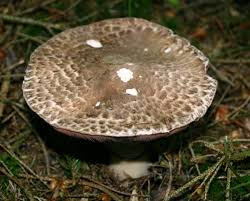

Error  No connection adapters were found for ''

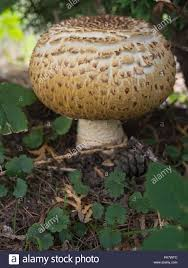
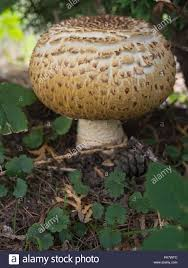

Error  No connection adapters were found for ''

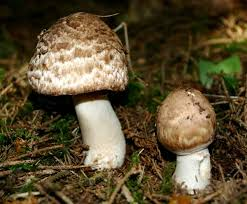
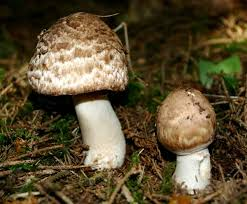

Error  No connection adapters were found for ''

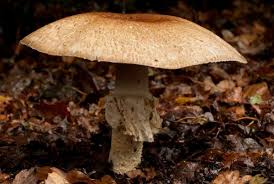
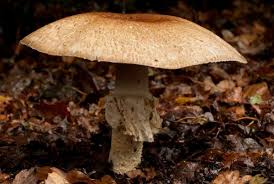

Error  No connection adapters were found for ''

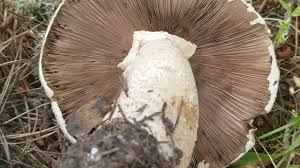
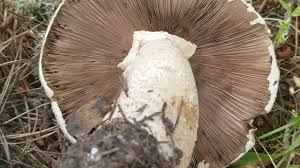

Error  No connection adapters were found for ''

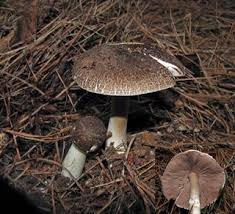
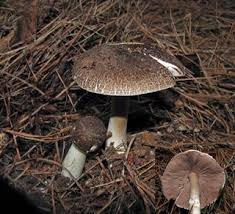

Error  No connection adapters were found for ''

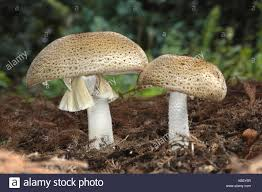
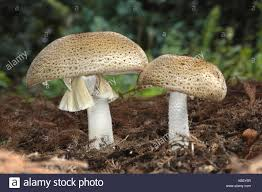

Error  No connection adapters were found for ''

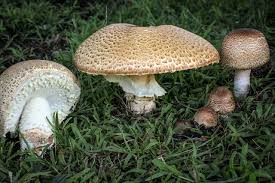
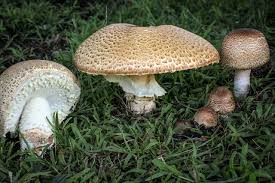

Error  No connection adapters were found for ''

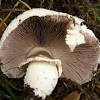
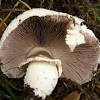

Error  No connection adapters were found for ''

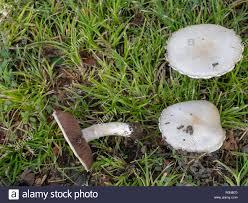
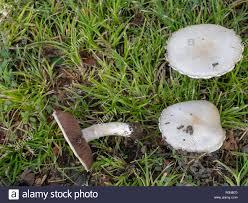

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

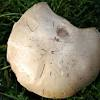
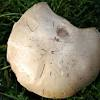
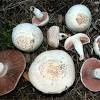
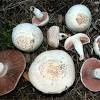

Error  No connection adapters were found for ''

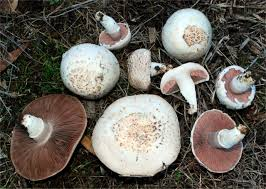
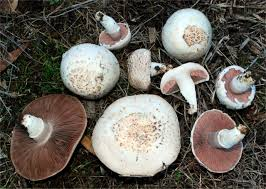

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

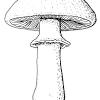
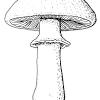
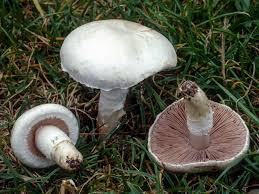
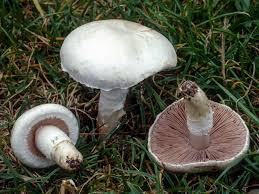

Error  No connection adapters were found for ''

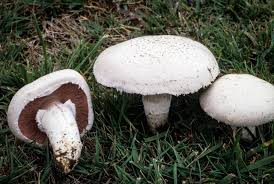
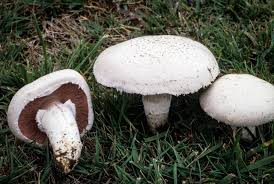

Error  No connection adapters were found for ''

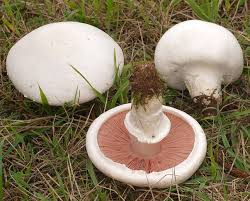
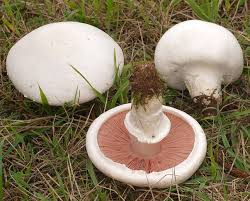

Error  No connection adapters were found for ''

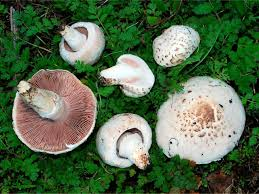
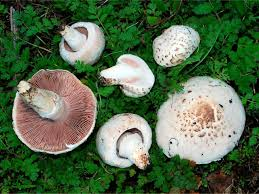

Error  No connection adapters were found for ''

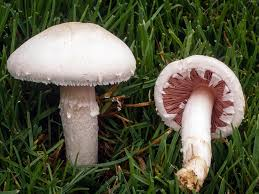
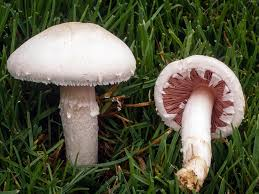

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

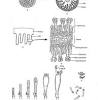
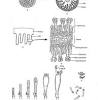
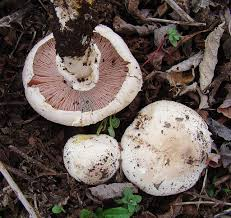
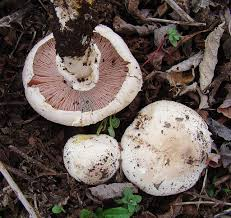

Error  No connection adapters were found for ''

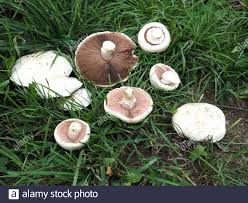
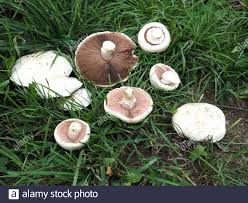

Error  No connection adapters were found for ''

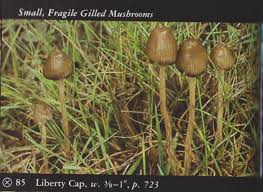
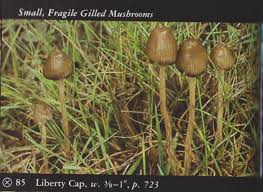

Error  No connection adapters were found for ''

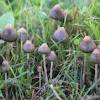
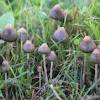

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

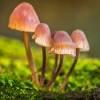
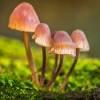
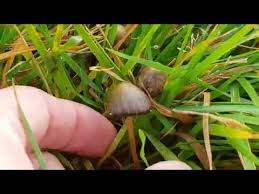
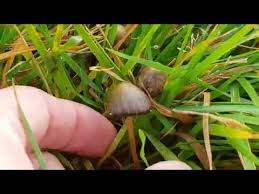

Error  No connection adapters were found for ''

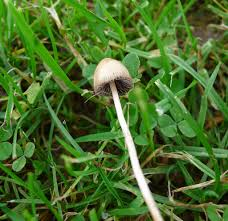
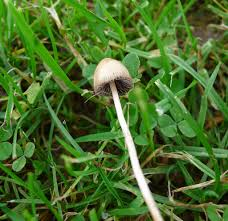

Error  No connection adapters were found for ''

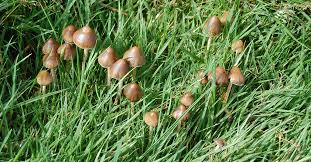
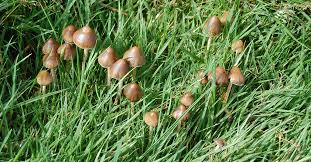

Error  No connection adapters were found for ''

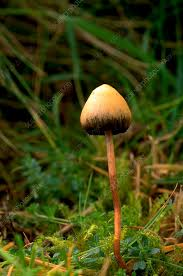
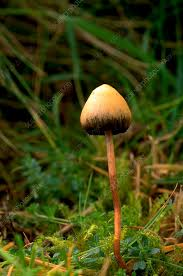

Error  No connection adapters were found for ''

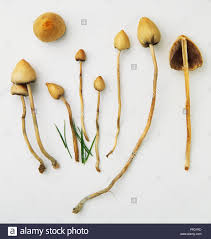
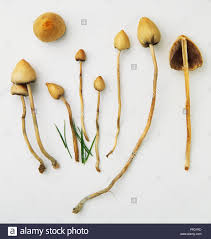

Error  No connection adapters were found for ''

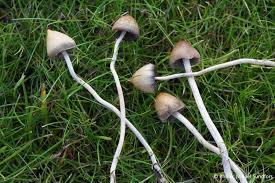
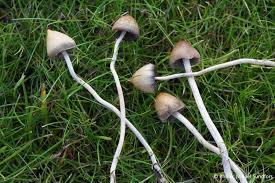

Error  No connection adapters were found for ''

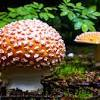
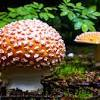

Error  No connection adapters were found for ''

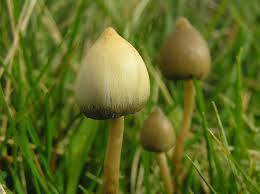
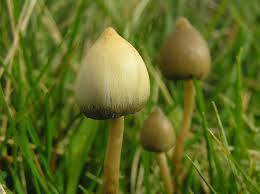

Error  No connection adapters were found for ''

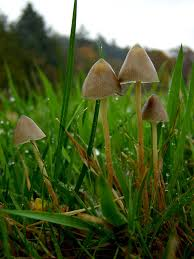
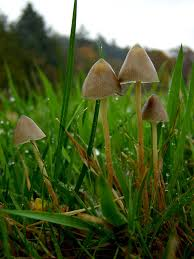

Error  No connection adapters were found for ''

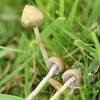
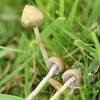

Error  No connection adapters were found for ''

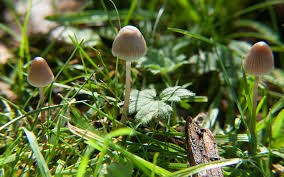
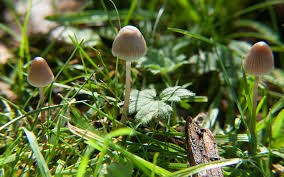

Error  No connection adapters were found for ''

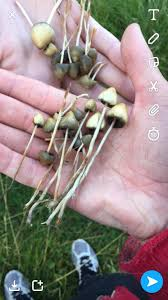
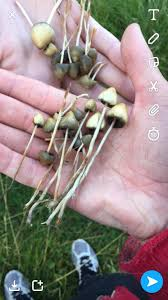

Error  No connection adapters were found for ''

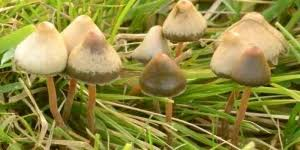
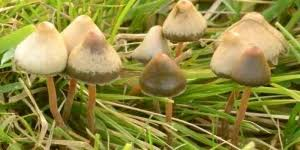

Error  No connection adapters were found for ''

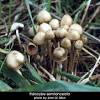
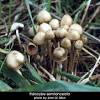

Error  No connection adapters were found for ''

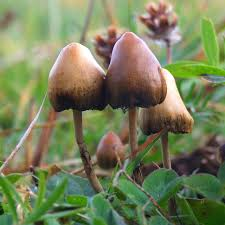
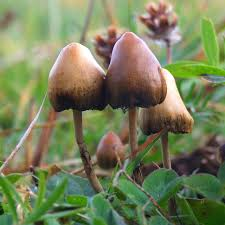

Error  No connection adapters were found for ''

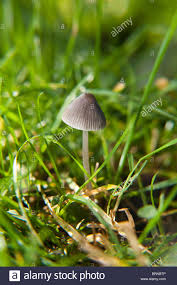
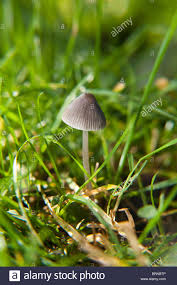

Error  No connection adapters were found for ''

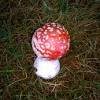
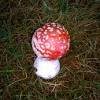

Error  No connection adapters were found for ''

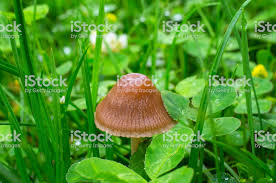
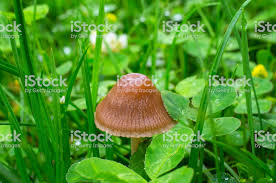

Error  No connection adapters were found for ''

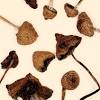
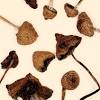

Error  No connection adapters were found for ''

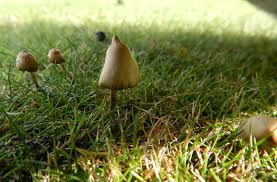
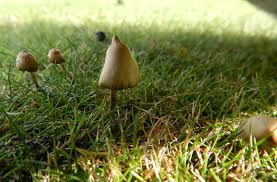

Error  No connection adapters were found for ''

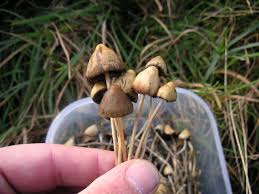
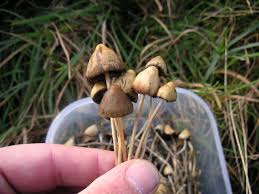

Error  No connection adapters were found for ''

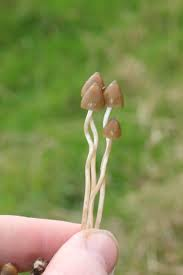
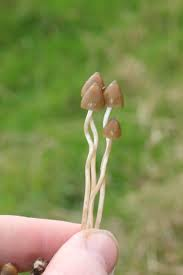

Error  No connection adapters were found for ''

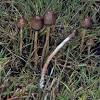
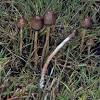

Error  No connection adapters were found for ''

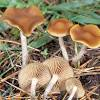
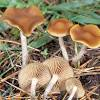

Error  No connection adapters were found for ''

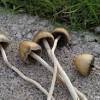
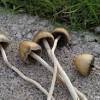

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

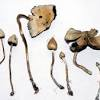
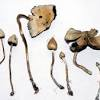
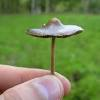
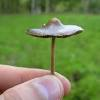

Error  No connection adapters were found for ''

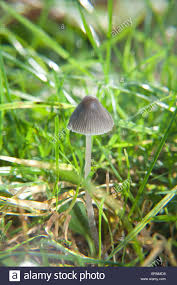
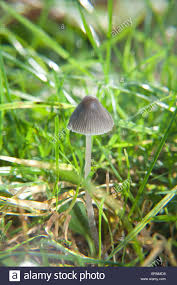

Error  No connection adapters were found for ''

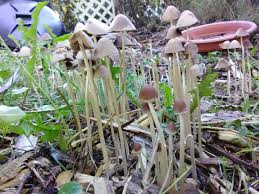
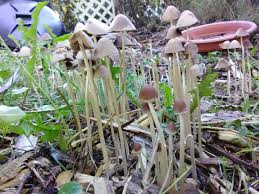

Error  No connection adapters were found for ''

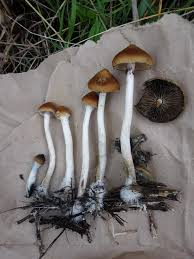
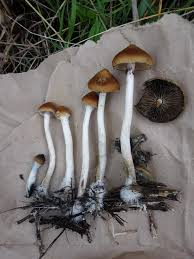

Error  No connection adapters were found for ''

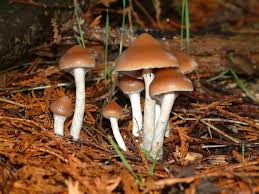
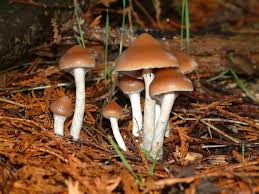

Error  No connection adapters were found for ''

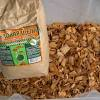
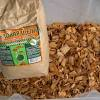

Error  No connection adapters were found for ''

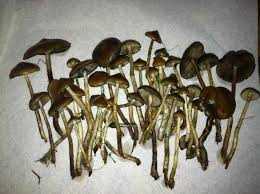
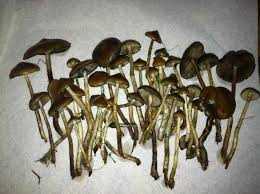

Error  No connection adapters were found for ''

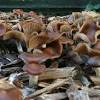
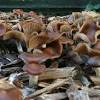

Error  No connection adapters were found for ''

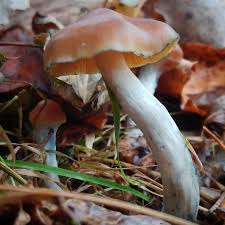
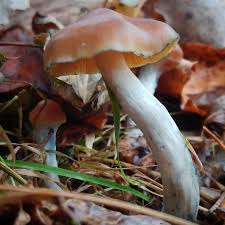

Error  No connection adapters were found for ''

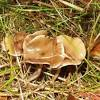
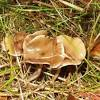

Error  No connection adapters were found for ''

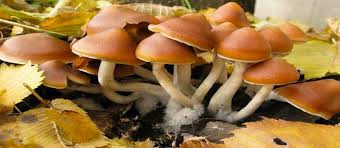
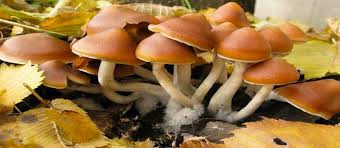

Error  No connection adapters were found for ''
Error  No connection adapters were found for ''

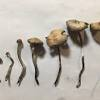
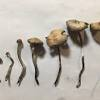
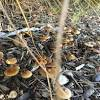
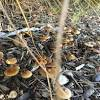

Error  No connection adapters were found for ''

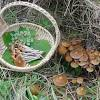
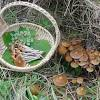

Error  No connection adapters were found for ''

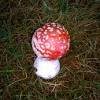
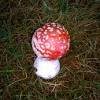

Error  No connection adapters were found for ''

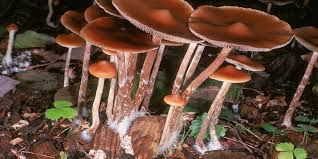
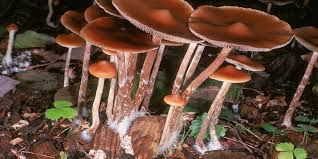

Error  No connection adapters were found for ''

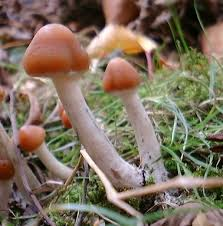
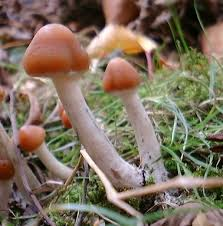

Error  No connection adapters were found for ''

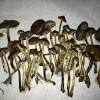
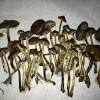

Error  No connection adapters were found for ''

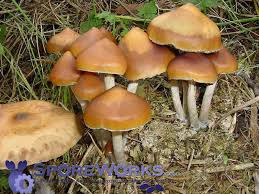
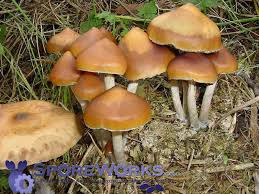

Error  No connection adapters were found for ''

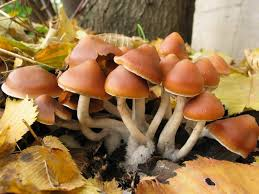
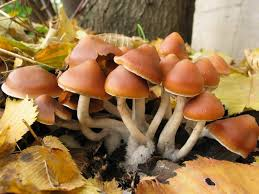

In [34]:
classes = ['non-psychedelic', 'psychedelic']
path_to_mush = 'data/mushroom-images-v2/'
for c in classes:
    csv_file = c + '.csv'
    dest = path_to_mush + c
    download_images(dest+'/'+csv_file, dest, max_pics=500, max_workers=0)     
    verify_images(dest, delete=True, max_size=500)

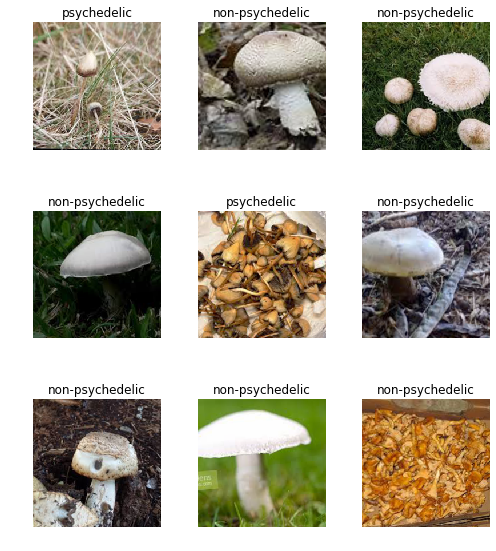

In [35]:
image_folder = 'data/mushroom-images-v2'
np.random.seed(42)
data = ImageDataBunch.from_folder(image_folder, train=".", valid_pct=0.2, bs=bs,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
data.classes
data.show_batch(rows=3, figsize=(7,8))

In [36]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [37]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [38]:
learn.fit_one_cycle(4)

In [39]:
learn.save('stage-1')

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

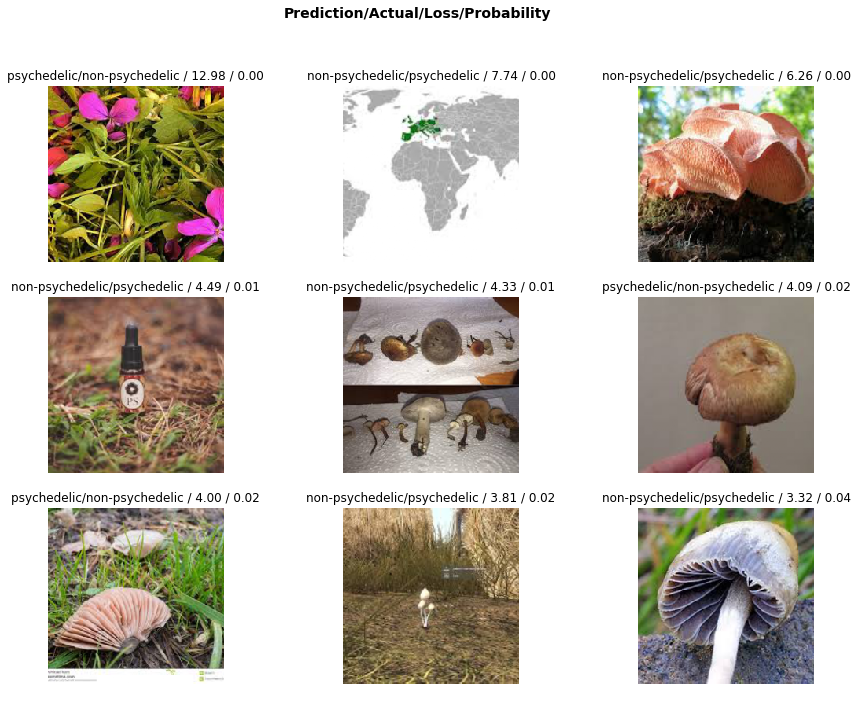

In [41]:
interp.plot_top_losses(9, figsize=(15,11))

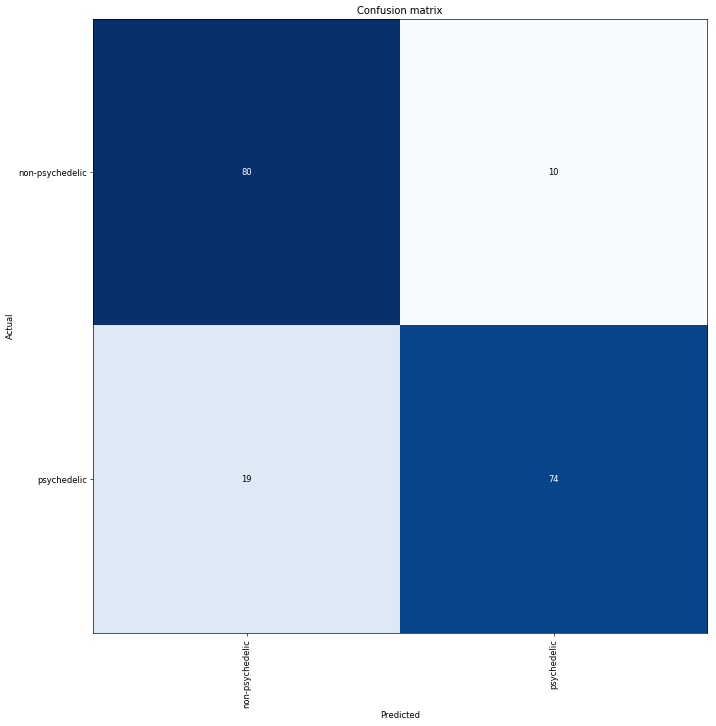

In [42]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

To train the model a little more I need to unfreeze some of the layers. I am not yet sure how FastAi declares the intial layers in resnet to remain frozen..but it does. 

In [43]:
learn.unfreeze()

In [44]:
learn.fit_one_cycle(1)

In [45]:
learn.load('stage-1');

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


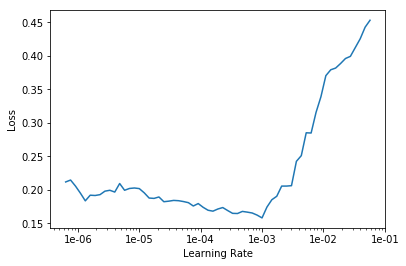

In [47]:
learn.recorder.plot()


In [48]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

In [49]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

Ok so not too bad for a first model, ending up with about 87.5% accuracy with some questionable photos in the mix (see the top losses plot).

I will try using resnet50 now and see if I can get any improvement in accuracy.

In [50]:
# Using larger images, therefore also using a smaller batch size
data = ImageDataBunch.from_folder(image_folder, train=".", valid_pct=0.2, bs=bs//2,
        ds_tfms=get_transforms(), size=299, num_workers=4).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


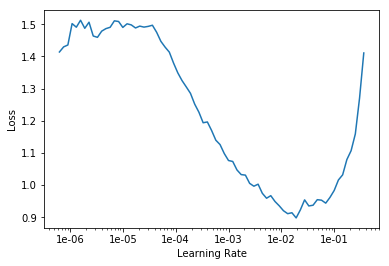

In [51]:
learn.lr_find()
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(8)

In [53]:
learn.save('stage-1-50')

In [54]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr = slice(1e-6,1e-4))

In [55]:
learn.fit_one_cycle(1, max_lr = slice(1e-6,1e-4))

In [56]:
learn.save('stage-1-50-v2')

In [57]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-6,1e-4))

So resnet50 does a slightly better job. This is a genuinely difficult task: predicting psychedelic mushrooms (4 species) against non-psychedelic (80 species). I'm going to set this aside for now and move on to week 2 of the FastAi course.